El archivo rrhh.csv contiene información de la situación laboral de los
trabajadores de la empresa ABAC. Las variables disponibles son:
● Estado: Estado actual del trabajador en la empresa (1: desvinculado, 0:
vinculado).
● Edad: Edad del trabajador en años.
● Ratio.Pago: Medida de pago por hora (numerico)
● Salario: Salario mensual en dólares que tiene o tenía el trabajador
● Dias.trabajados: Días que lleva o llevaba trabajando en la empresa
● Ausencias: Días que ha faltado a trabajar
● Sexo: Sexo del trabajador (Female , Male)

● Estado.Civil: Estado civil del trabajador (1: divorciado, 2: casado,3:
separado, 4: soltero, 5: viuda)
● Departamento: Lugar de trabajo en la empresa (Admin Offices,..)
● Posicion: Cargo del trabajador/empleado (Accountant I ,.... )
● Desempeño: Clasificación del desempeño del trabajador.
1. Cargue los datos y revise los formatos de cada variable, recuerde
codificar las variables como numéricas o factores según corresponda.
2. Realice un análisis descriptivo de sus datos. Determinar si existen
observaciones faltantes, en el caso de existir tome la decisión de
omitirlas del estudio u omitir la variable. Evalúe si existen posibles
incongruencias en la fuente de datos (ej: edades negativas). Y
finalmente análice la presencia de valores atípicos en las variables.
Comente.
3. Realice análisis de cómo se relacionan las variables continuas con la
variable de interés. Acompañe con gráficos y estadísticas. ¿Qué
variables pudieran resultar significativas a la hora de modelar la
probabilidad de que el trabajador sea desvinculado a la empresa?
4. Realice análisis de cómo se relacionan las variables categóricas con la
variable de interés. Acompañe con gráficos y estadísticas. ¿Qué
variables pudieran resultar significativas a la hora de modelar la
probabilidad de que el trabajador sea desvinculado a la empresa?

In [5]:
#importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('rrhh.csv')
df.head()


,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Sexo,Estado.Civil,Departamento,Posicion,Desempeño
0,0,30.0,28.50,4167.066667,3317,1,Female,2,Admin Offices,Accountant I,Fully Meets
1,0,34.0,23.00,6962.466667,1420,17,Male,1,Admin Offices,Accountant I,Fully Meets
2,0,31.0,29.00,4330.333333,1154,3,Male,4,Admin Offices,Accountant I,Fully Meets
3,0,32.0,21.50,4332.733333,58,15,Female,2,Admin Offices,Administrative Assistant,N/A- too early to review
4,0,30.0,16.56,3388.333333,940,2,Female,4,Admin Offices,Administrative Assistant,N/A- too early to review


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estado,310.0,0.409677,0.492569,0.0,0.000000,0.000000,1.000000,1.000000
Edad,310.0,38.867742,8.922459,25.0,32.000000,37.000000,44.000000,67.000000
Ratio.Pago,310.0,31.284806,15.383615,14.0,20.000000,24.000000,45.315000,80.000000
Salario,310.0,4606.534839,1677.350176,3004.6,3707.033333,4190.666667,4804.733333,16666.666667
Dias.trabajados,310.0,1296.080645,769.491382,2.0,766.250000,1238.000000,1732.750000,4339.000000
Ausencias,310.0,10.264516,5.843235,1.0,5.000000,10.000000,15.000000,20.000000
Estado.Civil,310.0,2.903226,1.150625,1.0,2.000000,3.000000,4.000000,5.000000


In [8]:
label_encoder = LabelEncoder()
df['sexo_category'] = label_encoder.fit_transform(df['Sexo'])
df['departamento_category'] = label_encoder.fit_transform(df['Departamento'])
df['posicion_category'] = label_encoder.fit_transform(df['Posicion'])
df['desempeño_category'] = label_encoder.fit_transform(df['Desempeño'])


In [9]:
df.isnull().sum()

Estado                   0
Edad                     0
Ratio.Pago               0
Salario                  0
Dias.trabajados          0
Ausencias                0
Sexo                     0
Estado.Civil             0
Departamento             0
Posicion                 0
Desempeño                0
sexo_category            0
departamento_category    0
posicion_category        0
desempeño_category       0
dtype: int64

Podemos ver que no existe ningun dato faltante

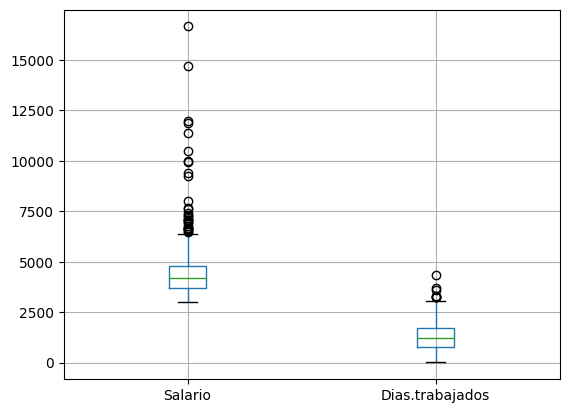

In [10]:
df[['Salario', 'Dias.trabajados']].boxplot()
plt.show()

Se puede ver que existen algunos outlayers en salario y dias trabajados

In [11]:
X = df[['Edad', 'Ratio.Pago', 'Salario', 'Dias.trabajados', 'Ausencias',]]
y = df['Estado']
model = LogisticRegression()
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
model.fit(X_train, Y_train)

coeficientes = model.coef_

for i, col in enumerate(X.columns):
    print(f'Coeficiente para {col}: {coeficientes[0][i]}')




Coeficiente para Edad: 0.044983986985451016
Coeficiente para Ratio.Pago: -0.040064464267978335
Coeficiente para Salario: -0.00011347113130499666
Coeficiente para Dias.trabajados: -0.002517205115306673
Coeficiente para Ausencias: 0.03002613319327783


In [12]:
	
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6774193548387096


In [13]:
print(confusion_matrix(Y_validation, predictions))

[[26 10]
 [10 16]]


In [14]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        36
           1       0.62      0.62      0.62        26

    accuracy                           0.68        62
   macro avg       0.67      0.67      0.67        62
weighted avg       0.68      0.68      0.68        62



Se puede observar que se tiene un aprox 72% de certeza de prediccion usando las variables continuas

In [16]:
X2 = df[['sexo_category', 'Estado.Civil', 'departamento_category', 'posicion_category', 'desempeño_category',]]
y2 = df['Estado']
model = LogisticRegression()
X_train2, X_validation2, Y_train2, Y_validation2 = model_selection.train_test_split(X2, y2, test_size=0.2, random_state=1)
model.fit(X_train2, Y_train2)

coeficientes2 = model.coef_

for i, col in enumerate(X2.columns):
    print(f'Coeficiente para {col}: {coeficientes2[0][i]}')

Coeficiente para sexo_category: 0.004795409753156298
Coeficiente para Estado.Civil: -0.24221787922710303
Coeficiente para departamento_category: 0.1551223180696152
Coeficiente para posicion_category: 0.11654509310790458
Coeficiente para desempeño_category: 0.17341900538891764


In [17]:
predictions2 = model.predict(X_validation2)
print(accuracy_score(Y_validation2, predictions2))

0.5483870967741935


In [18]:
print(confusion_matrix(Y_validation2, predictions2))

[[23 13]
 [15 11]]


In [19]:
print(classification_report(Y_validation2, predictions2))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        36
           1       0.46      0.42      0.44        26

    accuracy                           0.55        62
   macro avg       0.53      0.53      0.53        62
weighted avg       0.54      0.55      0.55        62



Las variables continuas resultan mas certeras en la prediccion, tomando en cuenta la presicion usando los diferentes tipos de variables